In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_train)

(60000, 784)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10

60000/60000 [==============================] - ETA: 0s - loss: 0.3874 - val_loss: 0.2730
Epoch 2/10

14592/60000 [======>.......................] - ETA: 3s - loss: 0.2721


60000/60000 [==============================] - ETA: 0s - loss: 0.2651 - val_loss: 0.2538
Epoch 3/10

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2460


60000/60000 [==============================] - ETA: 0s - loss: 0.2443 - val_loss: 0.2329
Epoch 4/10

60000/60000 [==============================] - ETA: 0s - loss: 0.2261 - val_loss: 0.2170
Epoch 5/10

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2151


60000/60000 [==============================] - ETA: 0s - loss: 0.2119 - val_loss: 0.2042
Epoch 6/10

60000/60000 [==============================] - ETA: 0s - loss: 0.2005 - val_loss: 0.1942
Epoch 7/10

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1950


60000/60000 [==============================] - ETA: 0s - loss: 0.1914 - val_loss: 0.1860
Epoch 8/10

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1842


60000/60000 [==============================] - ETA: 0s - loss: 0.1840 - val_loss: 0.1794
Epoch 9/10

60000/60000 [==============================] - ETA: 0s - loss: 0.1777 - val_loss: 0.1735
Epoch 10/10

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1735


60000/60000 [==============================] - ETA: 0s - loss: 0.1722 - val_loss: 0.1685


In [9]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
x_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

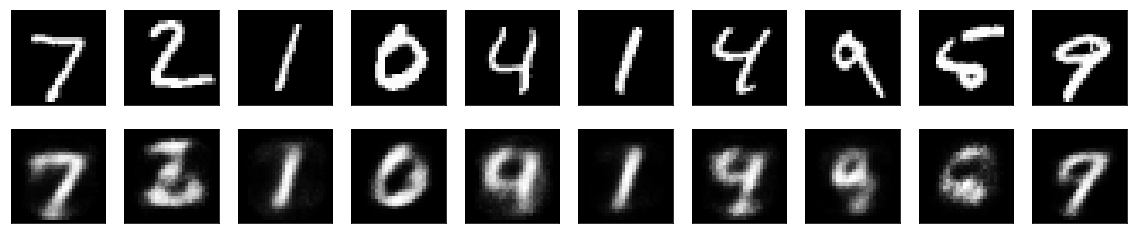

In [7]:

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()